# Overlays Example:

This is just a quick example of plotting a number of BigWig files using the package API

### Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotnado.api as pn
from plotnado.api import TrackWrapper
import numpy as np

## Define the BigWig files that we want to plot

**Note**: The BigWig files are not included in the dataset, as it is possible to just use remote URLs to plot the data I'm going to use data stored on the CCB Oxford HPC.

To make life easier I'm going to make a dictionary of the BigWig files that I want to plot. You could just add these one by one to the plot if you wanted to.

In [2]:
bigwigs = {
    "MV4;11 0nM EPZ H3K79me2": "https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4110nMH3K79me2_bigWig.bigWig",
    "MV4;11 0.5nM EPZ H3K79me2": "https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV41105nMH3K79me2_bigWig.bigWig",
    "MV4;11 2nM EPZ H3K79me2": "https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4112nMH3K79me2_bigWig.bigWig",
    "MV4;11 5nM EPZ H3K79me2": "https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4115nMH3K79me2_bigWig.bigWig",
}

# Generate the plot

In [19]:
figure = pn.Figure()
figure.add_track("scale")  # Add a scale track
figure.add_track(
    "genes", genome="hg38", gene_style="normal", min_gene_length=1e5, height=0.5
)  # Add a gene track, this can specify a file in bed12 format or can be any supported genome name

# Create the bigwig tracks using the TrackWrapper class. This is a simplified wrapper that the add_tracks method uses internally.
tracks_for_figure = []
colors = sns.color_palette("husl", len(bigwigs))

for (name, url), color in zip(bigwigs.items(), colors):
    # Create a track for each bigwig file
    track = TrackWrapper(
        "bigwig",
        file=url,
        title=name,
        style="stairsfilled",
        color=color,
        alpha=0.5, # Set the transparency of the track
        autoscale_group="h3k79me3", # Autoscale the tracks in the same group, this can be any identifier that you want
        data_range_style='text', # Show the data range as text rather than a bar
    )

    # For illustration purposes I will add the track to the figure here, but this is not necessary
    figure.add_track(track)

    # Add the track to the list of tracks to be overlayed
    tracks_for_figure.append(track)

# Create an overlay track
overlay_track = TrackWrapper("bigwig_overlay", tracks_for_figure)

# Add the overlay track to the figure
figure.add_track(overlay_track)

# Add an x-axis track
figure.add_track("xaxis")

# Display the plot

[W::hts_idx_load3] The index file is older than the data file: /ceph/project/milne_group/asmith/software/mambaforge/envs/plotnado/lib/python3.12/site-packages/plotnado/data/gene_bed_files/hg38_genes.bed.bgz.tbi
2024-07-02 15:34:00.494 | DEBUG    | plotnado.api.genes:plot_genes:176 - ylim 100,0


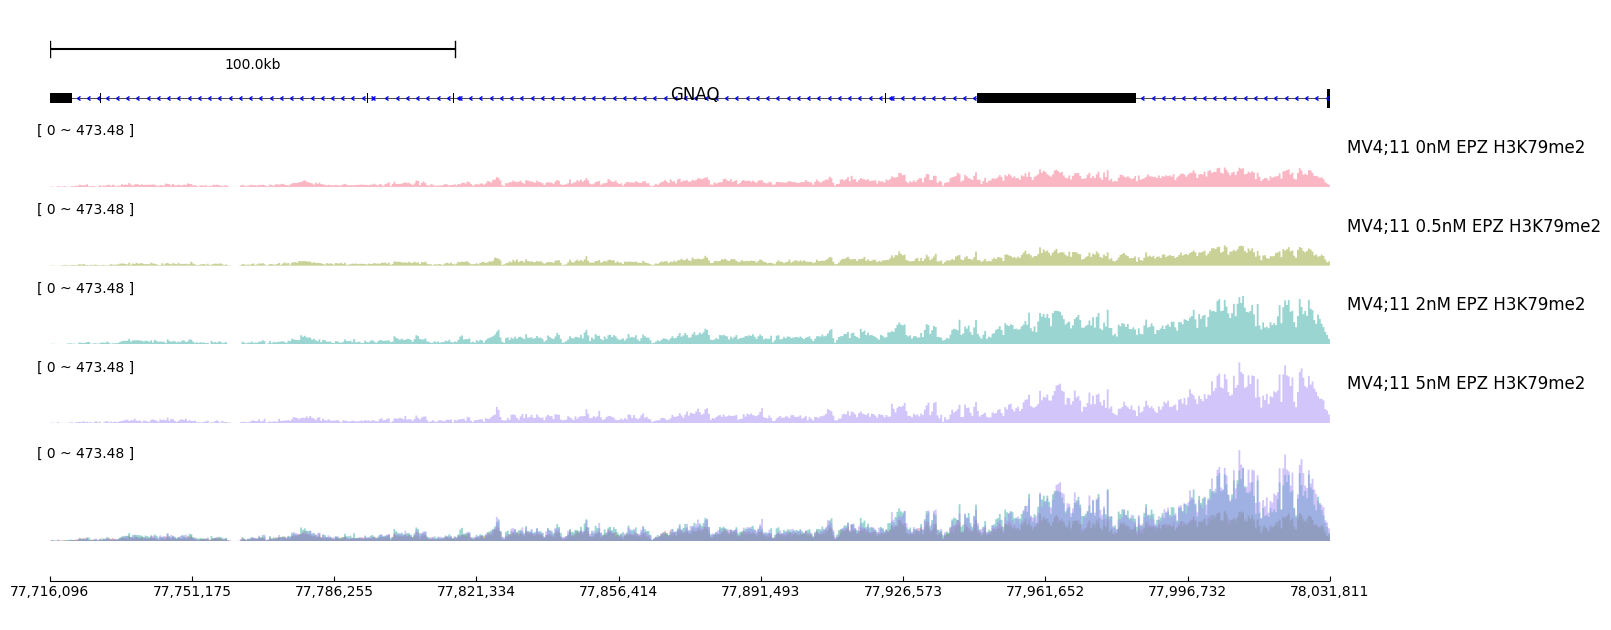

In [20]:
figure.plot_gene("GNAQ", "hg38")